In [1]:
from controller import IntelligentDriverModel, OurController, TrajectoryFollower
from simulation import Simulation
import pandas as pd

In [2]:
def follow_ngsim(id, percentage):
    ngsim_df = pd.read_csv("ngsim_data/trajectories-0805am-0820am.csv")
    ngsim_df_id = ngsim_df[ngsim_df["Vehicle_ID"] == id]

    # Convert units
    time_vector = (ngsim_df_id['Global_Time'] - ngsim_df_id['Global_Time'].iloc[0]) / 1000.0  # ms → s
    position_vector = ngsim_df_id['Local_Y'].values * 0.3048  # ft → m
    velocity_vector = ngsim_df_id['v_Vel'].values * 0.3048 # ft/s → m/s

    # Create lead controller
    lead_controller = TrajectoryFollower(time_vector, position_vector)

    # Simulation
    sim = Simulation(
        lead_car=lead_controller,
        n_cars=25,
        percentage=percentage,
        dt=0.1,
        total_time=(ngsim_df_id["Global_Time"].max() - ngsim_df_id["Global_Time"].min()) / 1000,
        initial_spacing=2.5 * velocity_vector[0],
        initial_speed=position_vector[0]  # or a reasonable starting speed
    )
    sim.plot_space_gaps()
    sim.plot_velocities()
    sim.plot_relative_velocities()
    sim.plot_positions()
    sim.plot_accelerations()
    if percentage > 0.0:
        sim.plot_modes()
    sim.plot_speed_boxplot()
    
    return sim.compute_metrics()

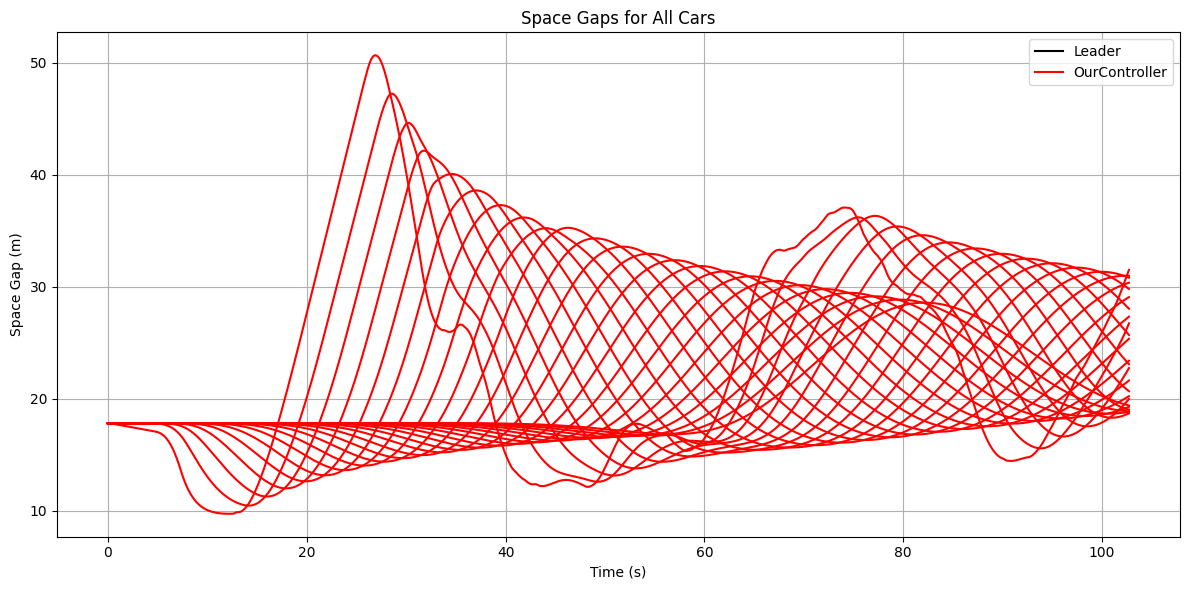

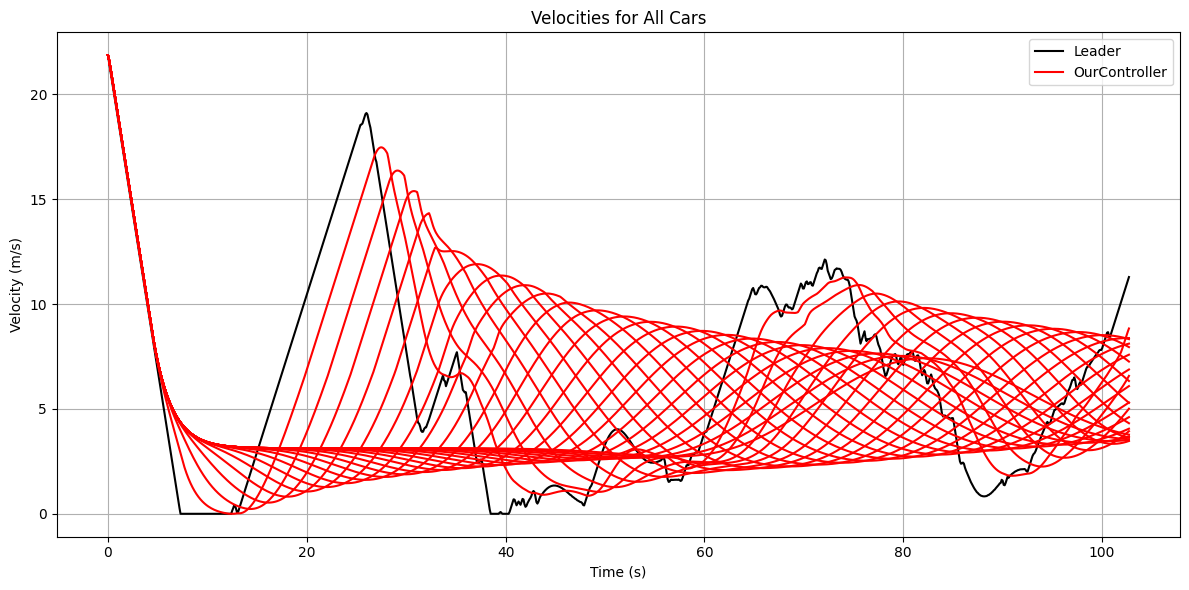

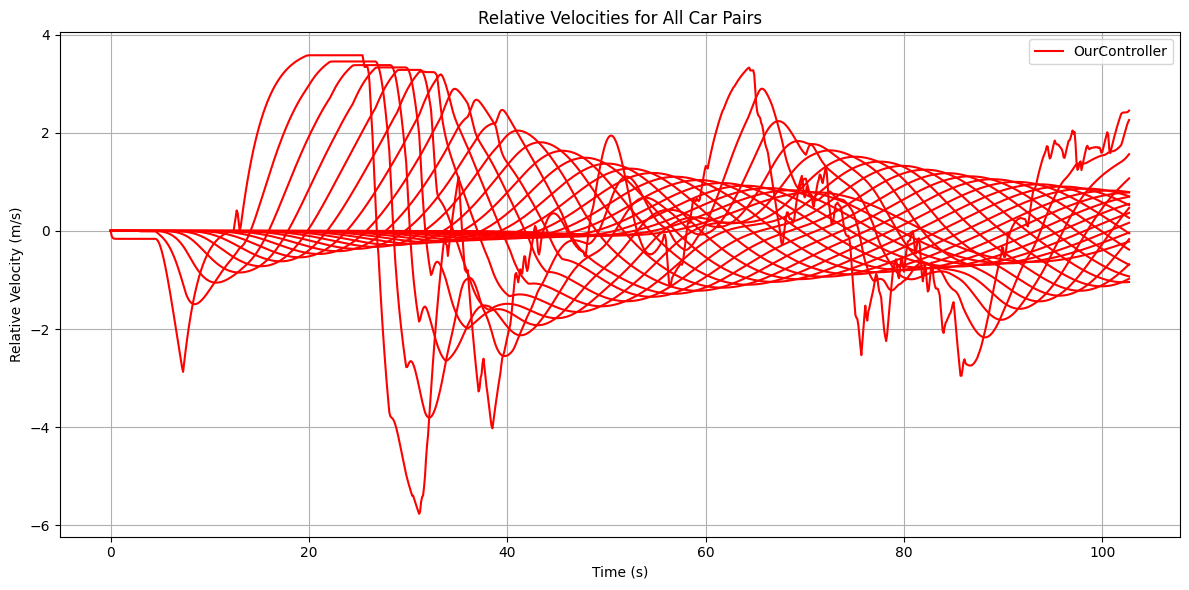

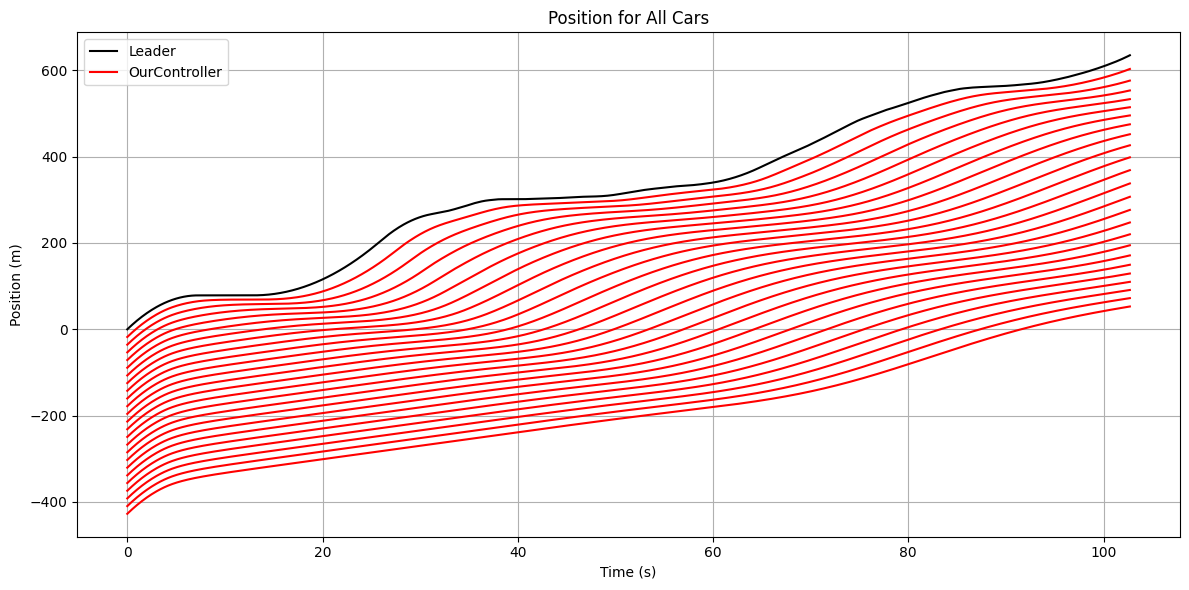

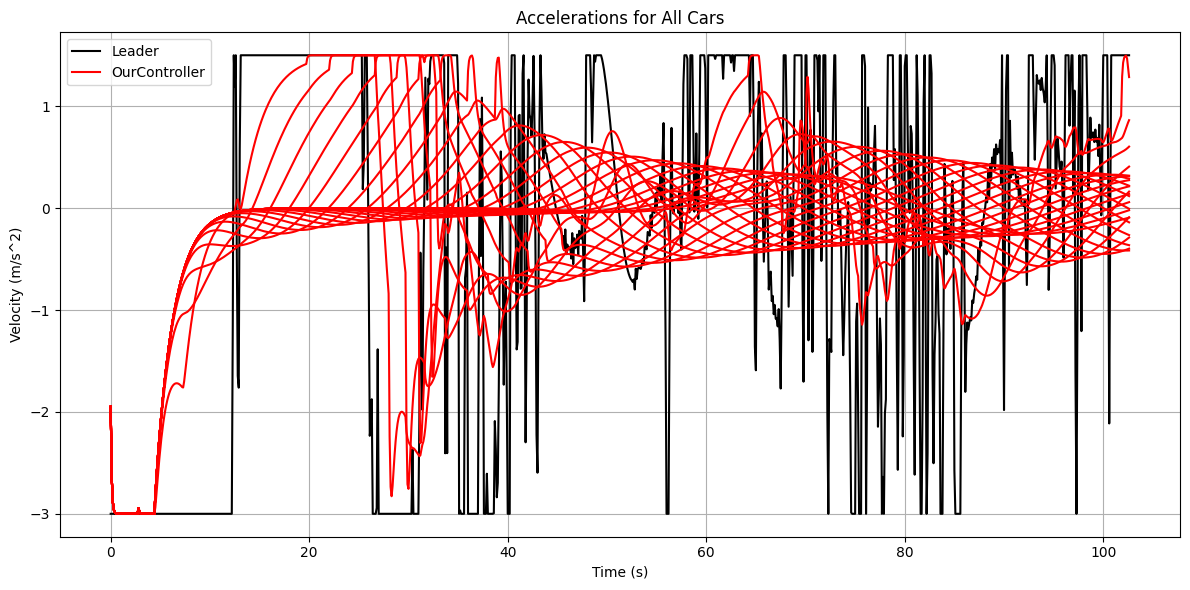

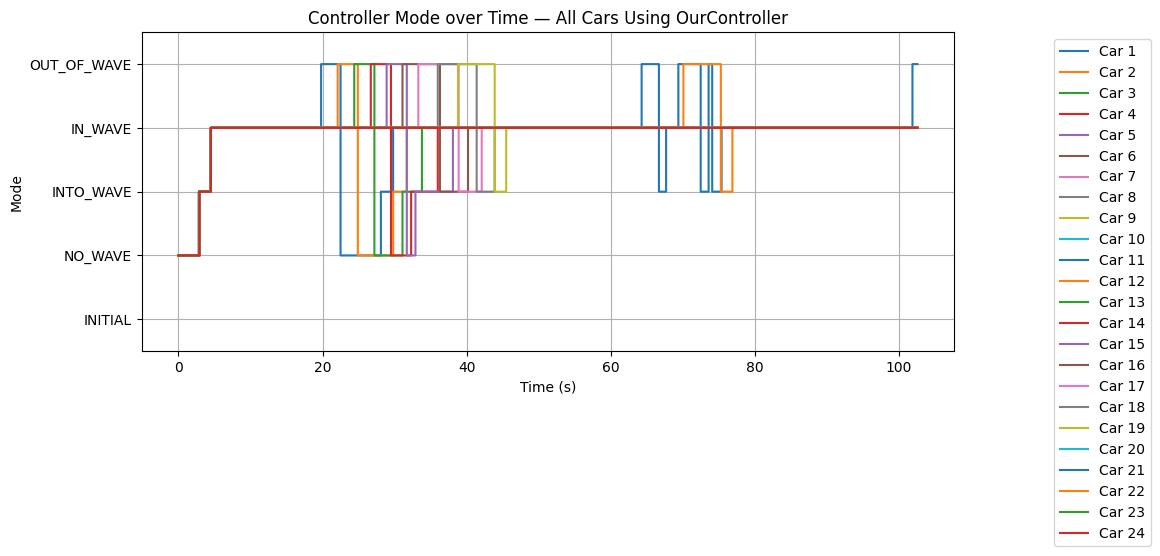

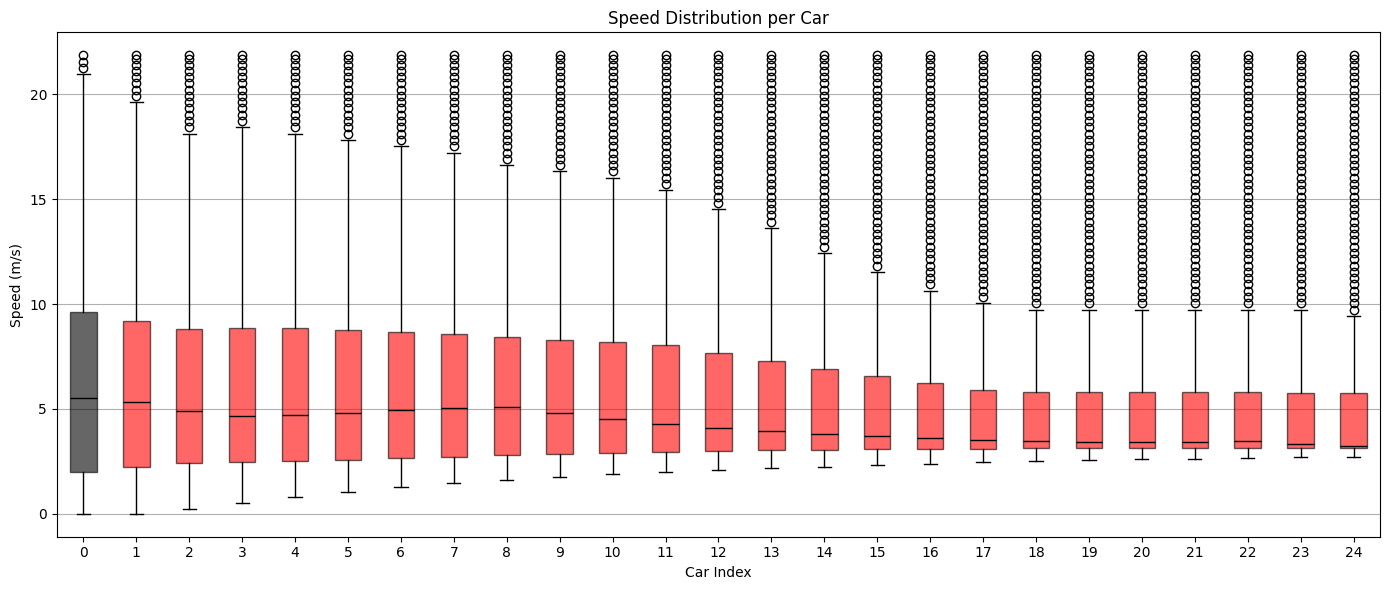

{'max_jerk_per_car': [45.0,
  14.044908334144996,
  15.389116612570115,
  16.228671235057792,
  14.508607723204724,
  10.903106778473676,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001],
 'string_stability': 72.42121582086358,
 'num_crashes': 0,
 'first_crash_index': None,
 'hard_brake_times': [22.200000000000003,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

In [ ]:
follow_ngsim(513, 0.0)

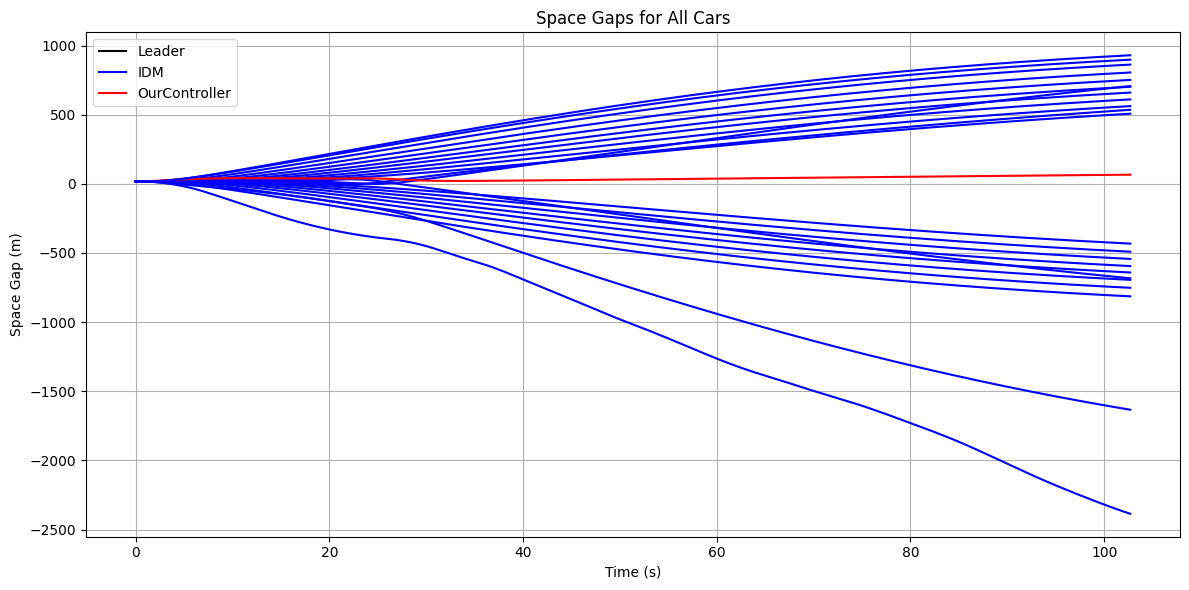

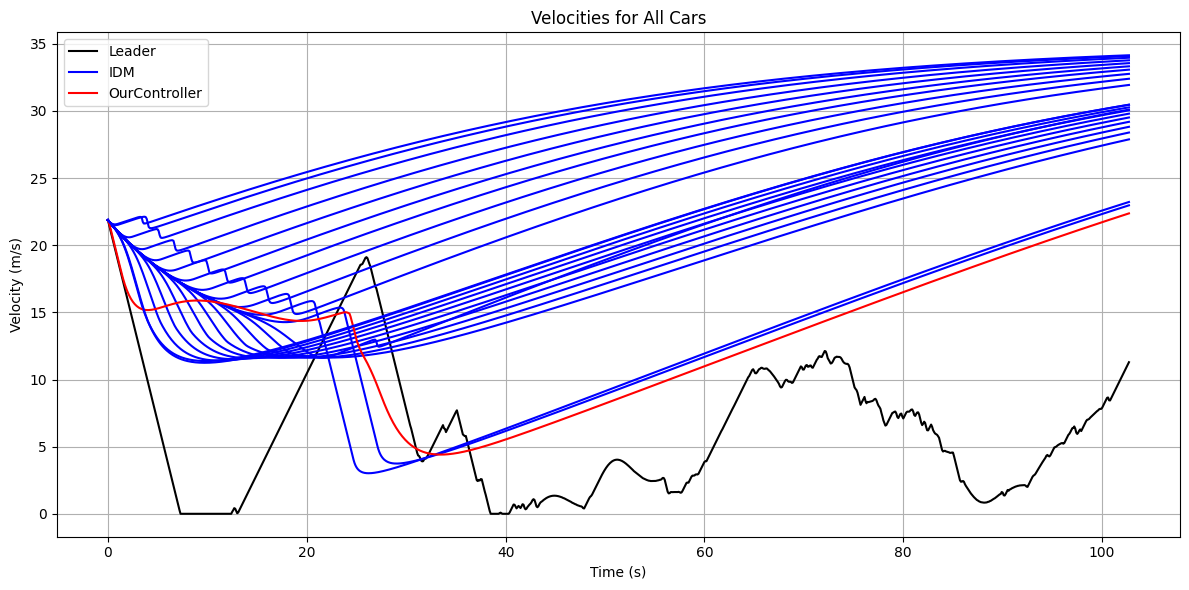

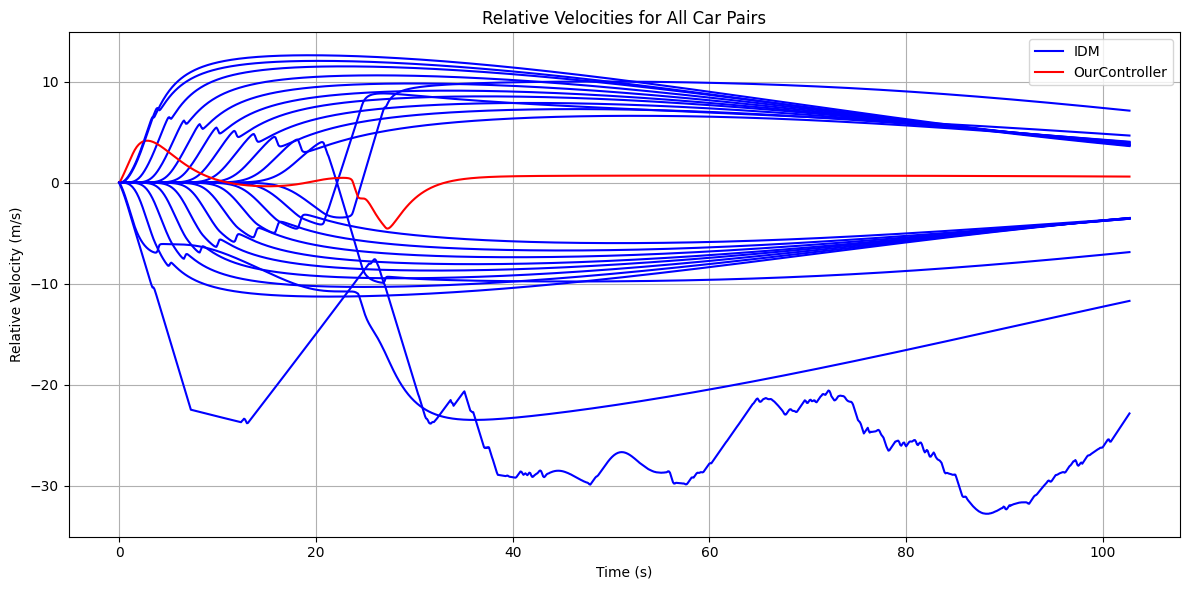

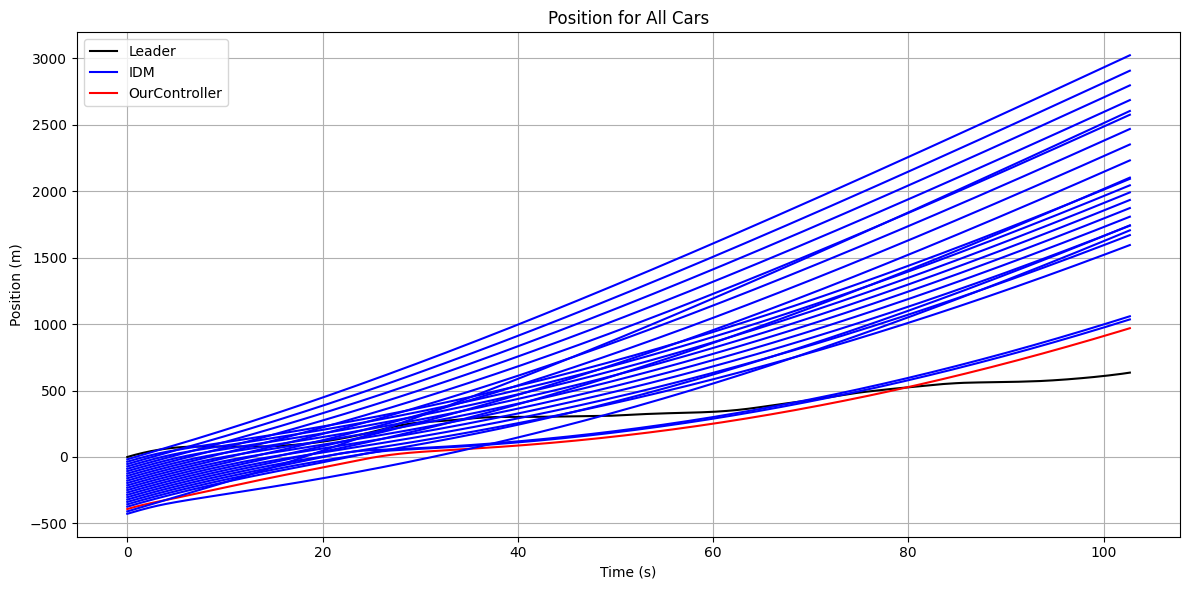

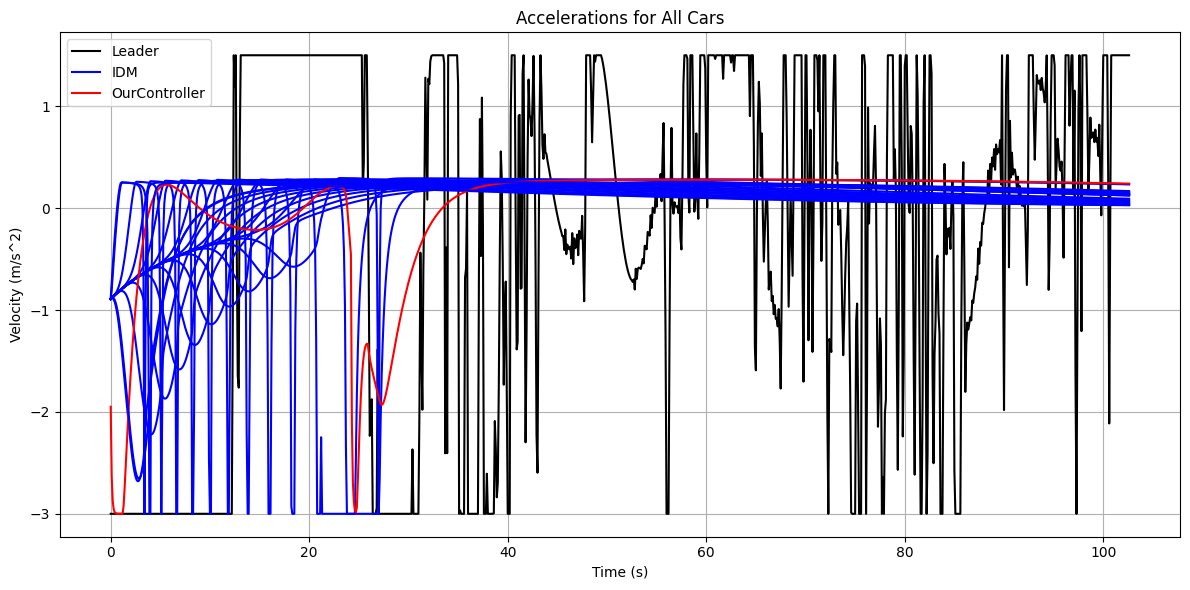

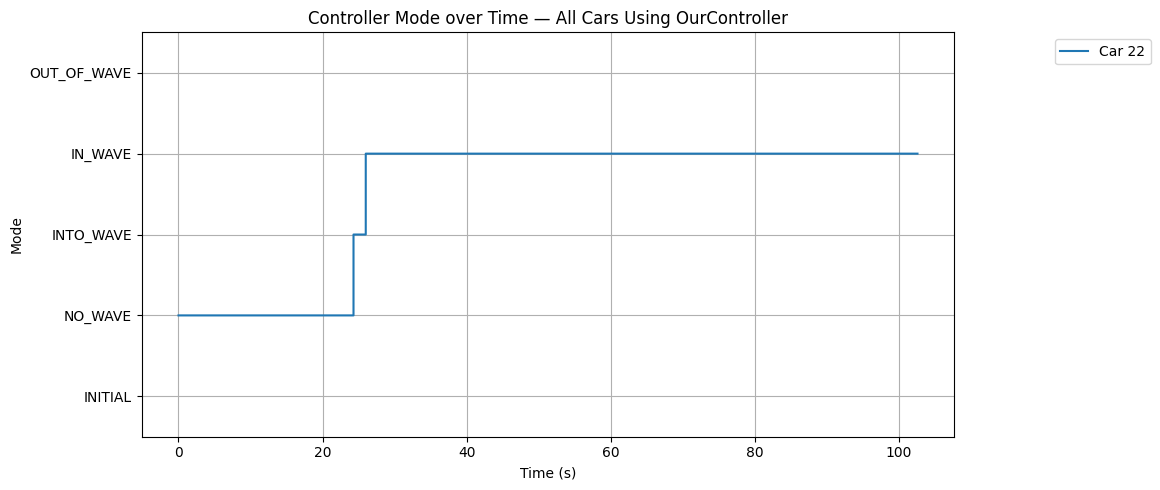

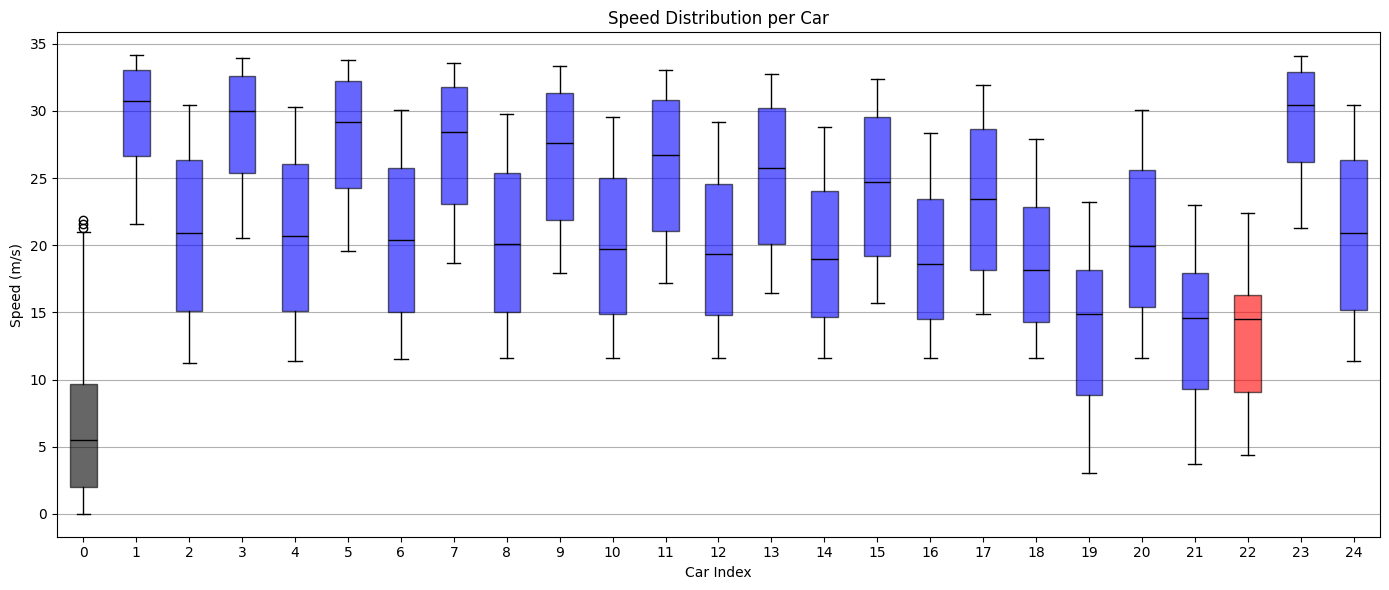

{'max_jerk_per_car': [45.0,
  23.98170940815767,
  2.312449452322376,
  16.811454895005543,
  1.8282979081152528,
  24.96918045998794,
  1.6060903415235606,
  25.40952189809652,
  1.390188086524704,
  23.068350545088585,
  1.1172629260274525,
  16.213526961059646,
  1.0155081668595367,
  17.065407633459262,
  0.86855945488159,
  18.61560760798305,
  0.8012884836785394,
  21.4465220674207,
  0.7132543097715771,
  17.1859032079727,
  22.61505175640548,
  14.053280374912065,
  16.555280433733344,
  22.345161455944073,
  2.0354872262500856],
 'string_stability': 2383.395892751852,
 'num_crashes': 13,
 'first_crash_index': 1,
 'hard_brake_times': [22.200000000000003,
  0.1,
  0.0,
  0.1,
  0.0,
  0.2,
  0.0,
  0.2,
  0.0,
  0.2,
  0.0,
  0.2,
  0.0,
  0.2,
  0.0,
  0.30000000000000004,
  0.0,
  0.30000000000000004,
  0.0,
  3.8000000000000003,
  0.1,
  3.3000000000000003,
  0.0,
  0.2,
  0.0]}

In [5]:
follow_ngsim(513, 0.05)

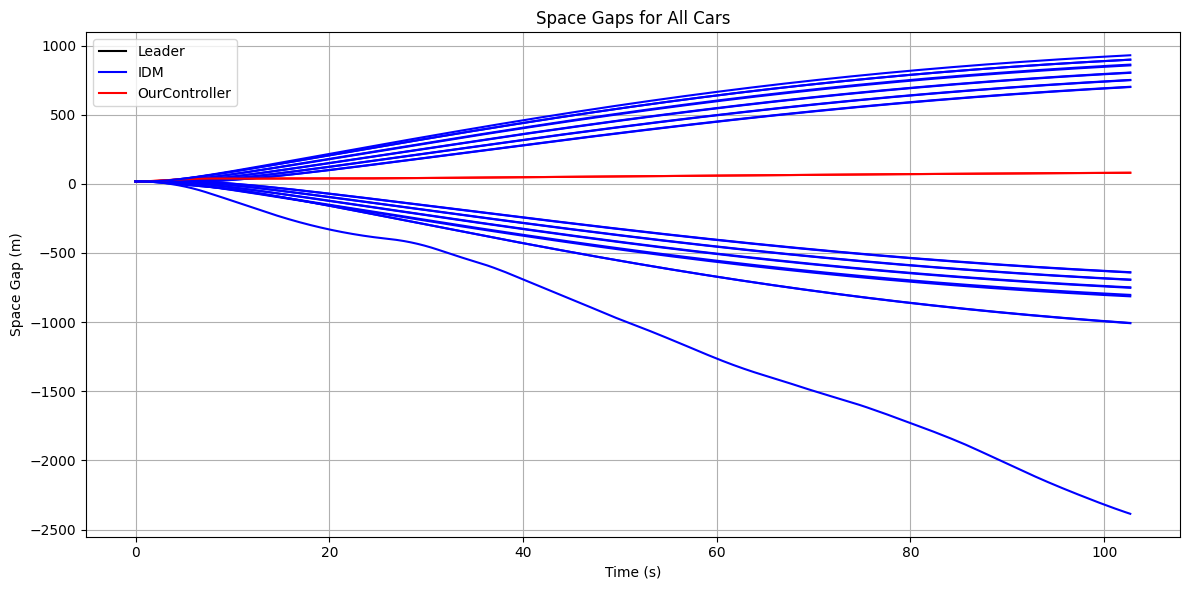

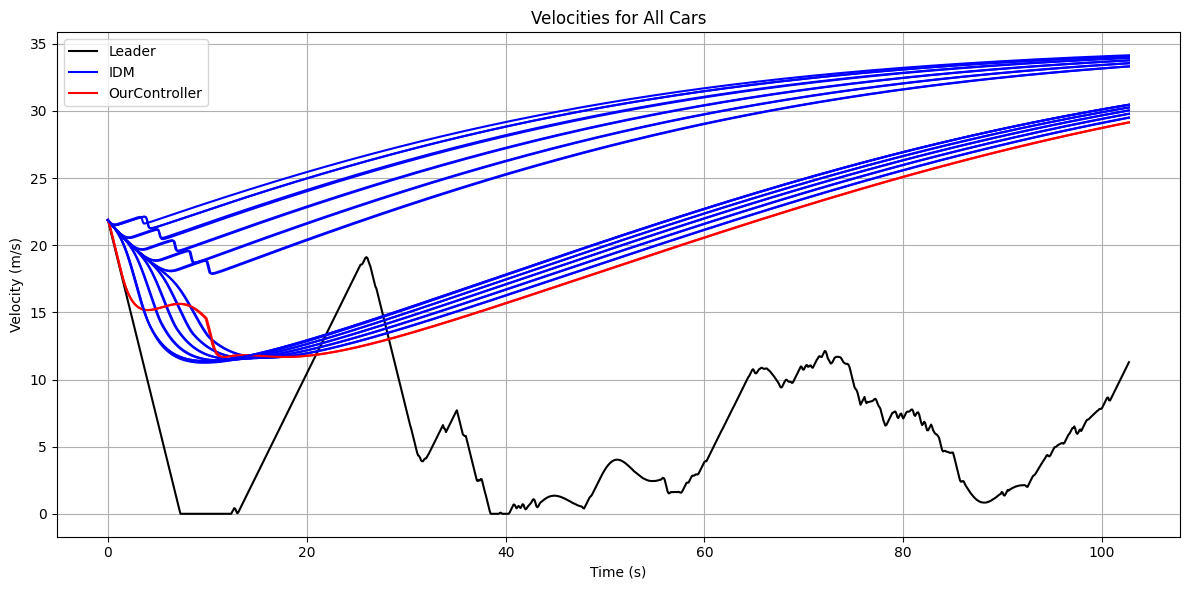

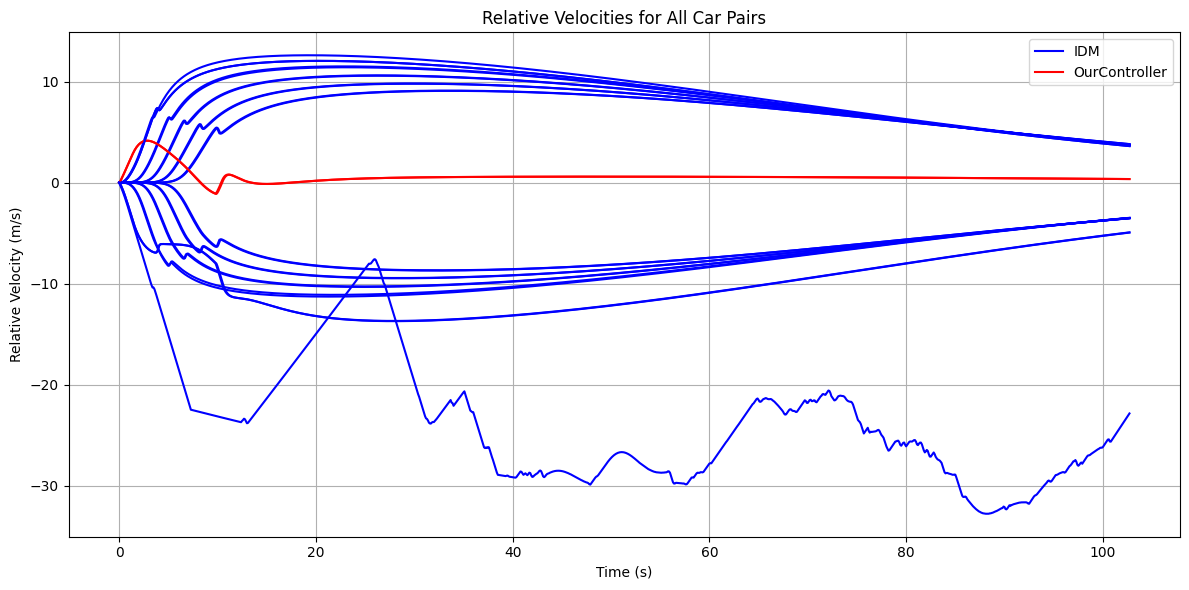

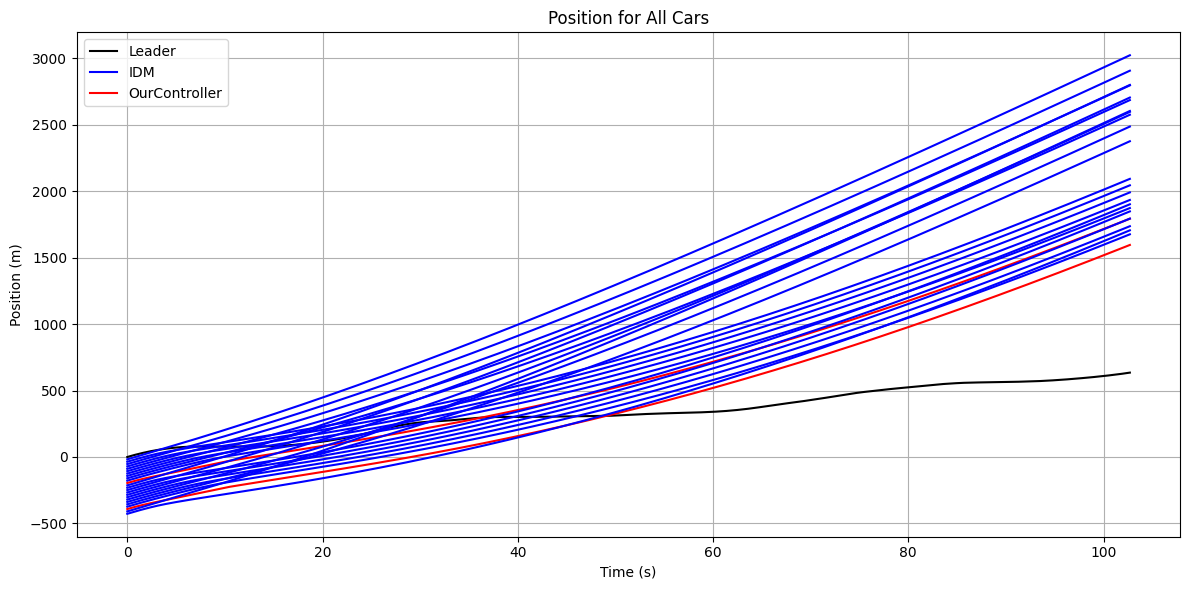

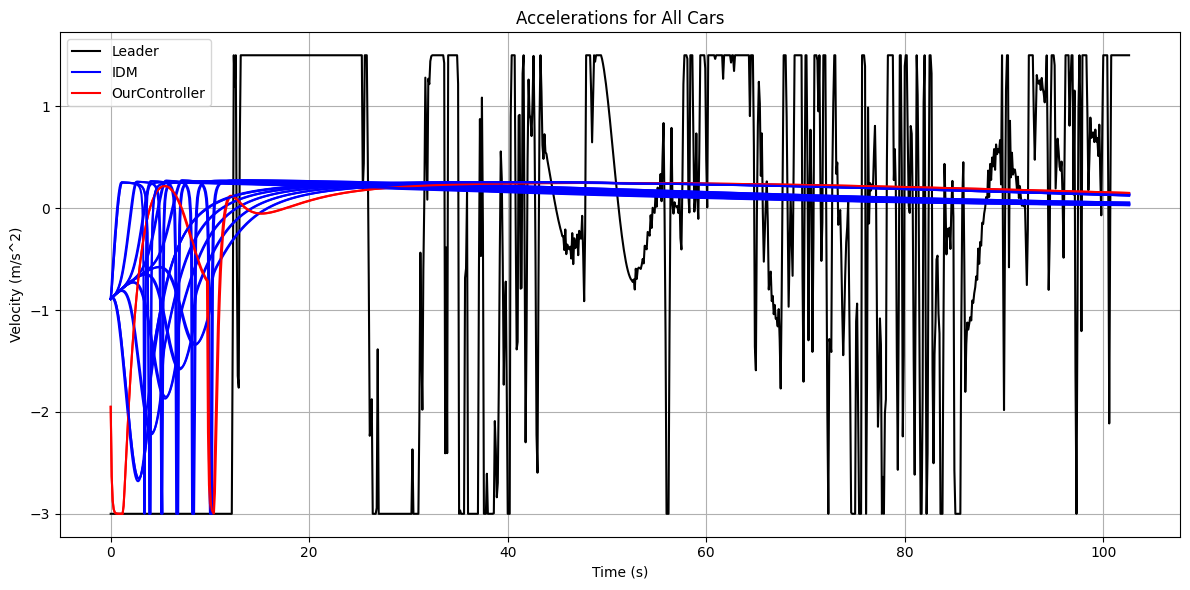

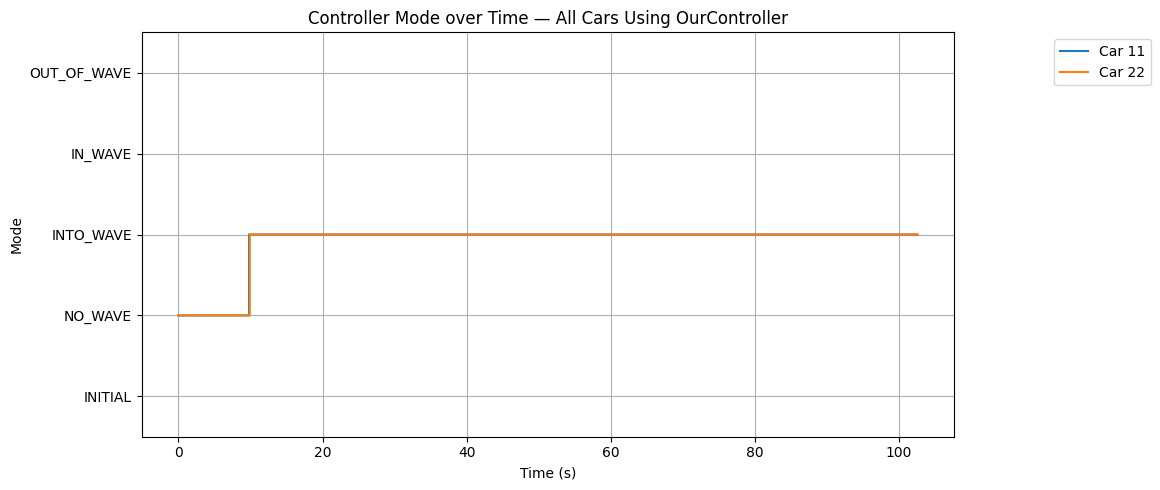

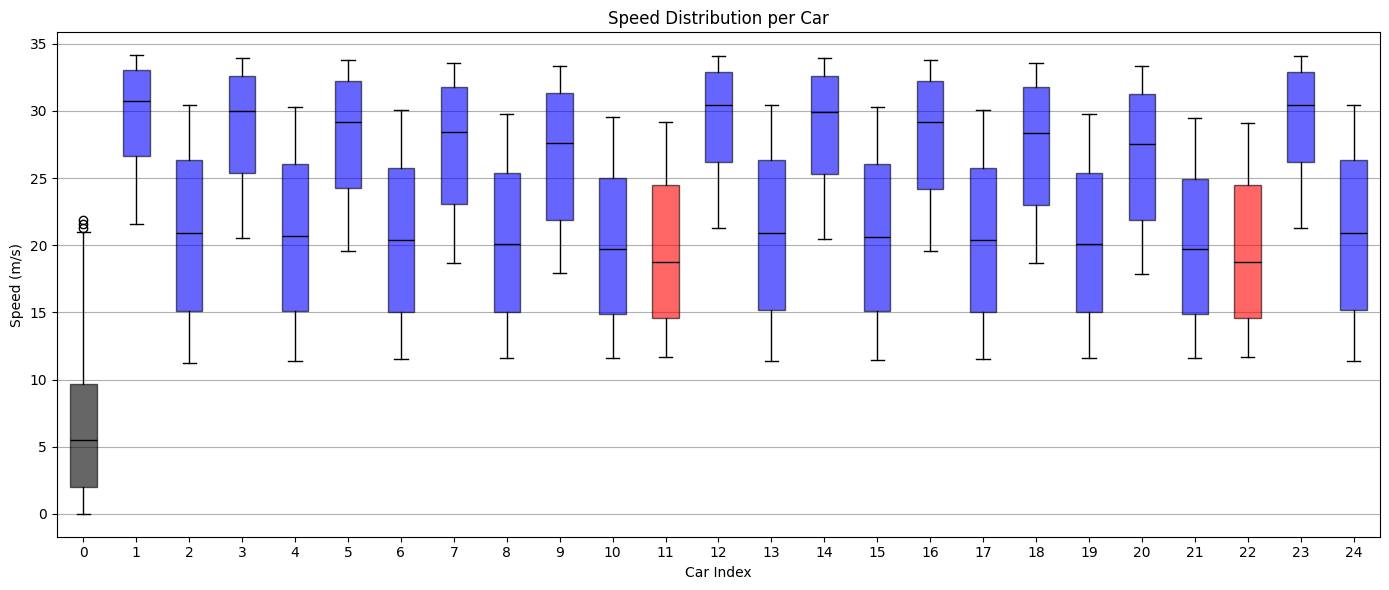

{'max_jerk_per_car': [45.0,
  23.98170940815767,
  2.312449452322376,
  16.811454895005543,
  1.8282979081152528,
  24.96918045998794,
  1.6060903415235606,
  25.40952189809652,
  1.390188086524704,
  23.068350545088585,
  1.1172629260274525,
  14.841878435288528,
  22.346011075713545,
  2.0354844198973487,
  20.957473231249313,
  1.757745707043521,
  24.04961798825163,
  1.5838166411462429,
  24.9800269539952,
  1.3756533271698657,
  22.706497042080475,
  1.1132219587371572,
  14.834023338048016,
  22.345826700883034,
  2.035485068515106],
 'string_stability': 2383.395892751852,
 'num_crashes': 11,
 'first_crash_index': 1,
 'hard_brake_times': [22.200000000000003,
  0.1,
  0.0,
  0.1,
  0.0,
  0.2,
  0.0,
  0.2,
  0.0,
  0.2,
  0.0,
  0.0,
  0.2,
  0.0,
  0.1,
  0.0,
  0.2,
  0.0,
  0.2,
  0.0,
  0.2,
  0.0,
  0.0,
  0.2,
  0.0]}

In [6]:
follow_ngsim(513, 0.1)

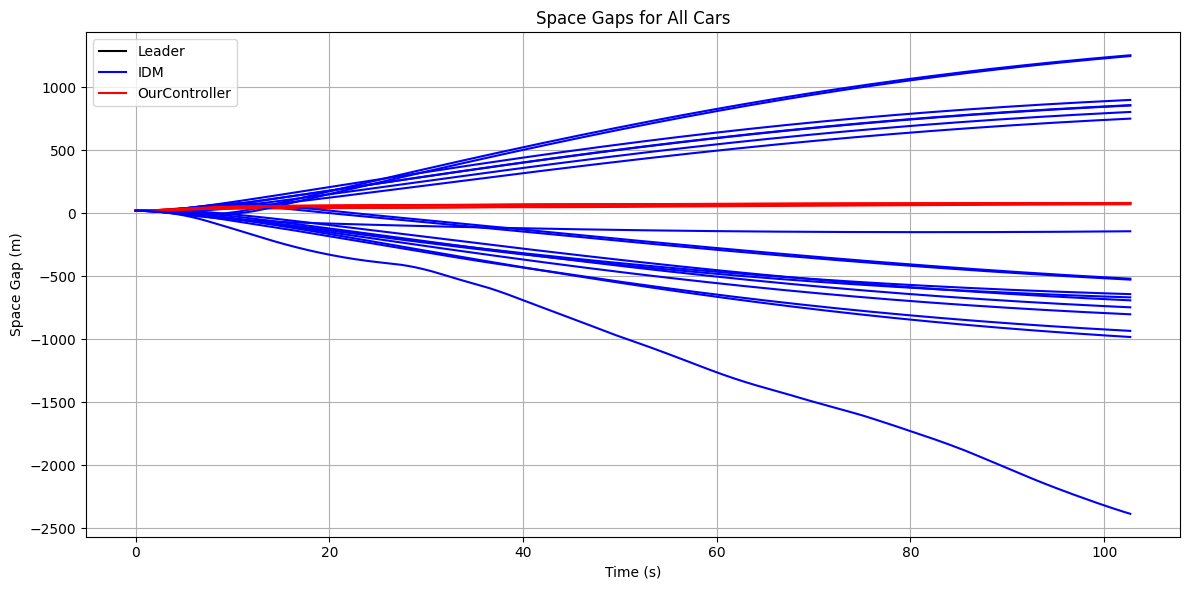

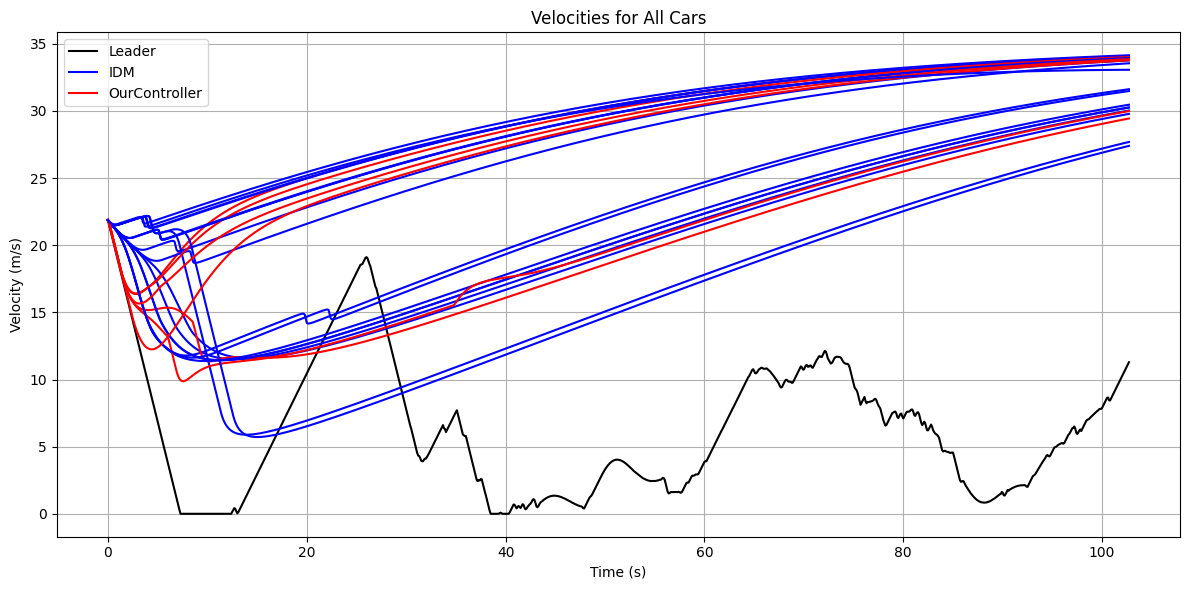

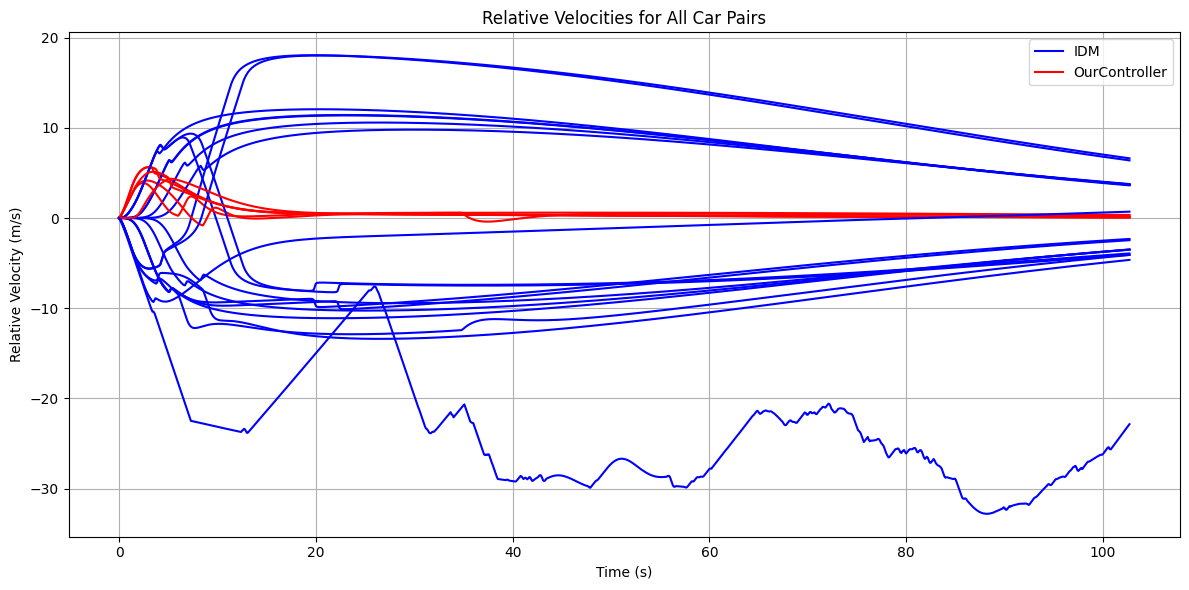

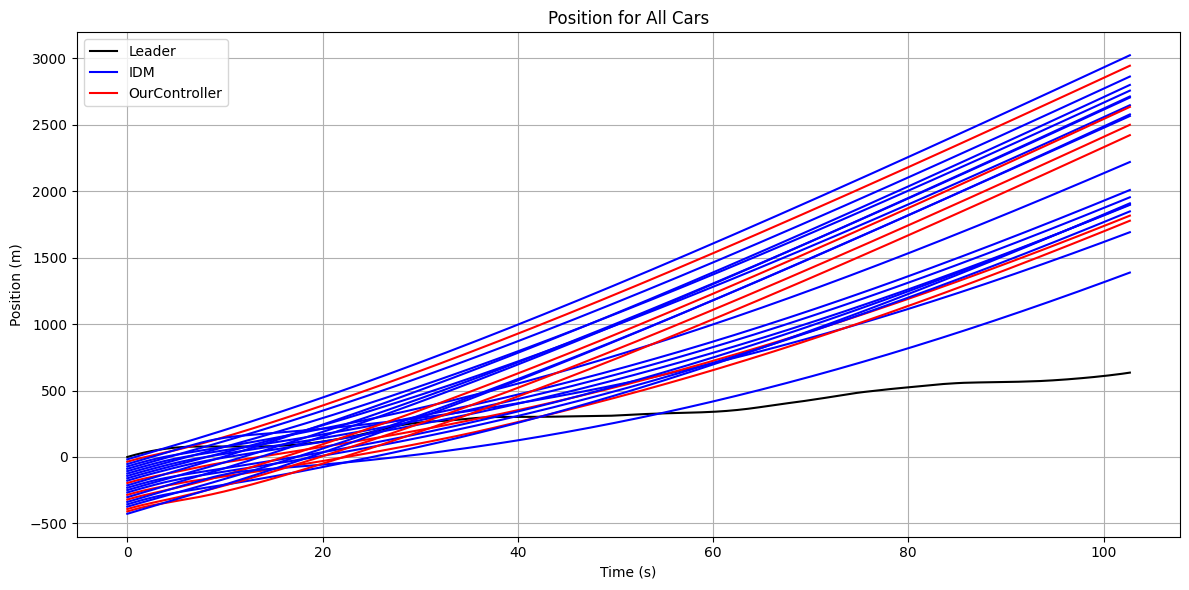

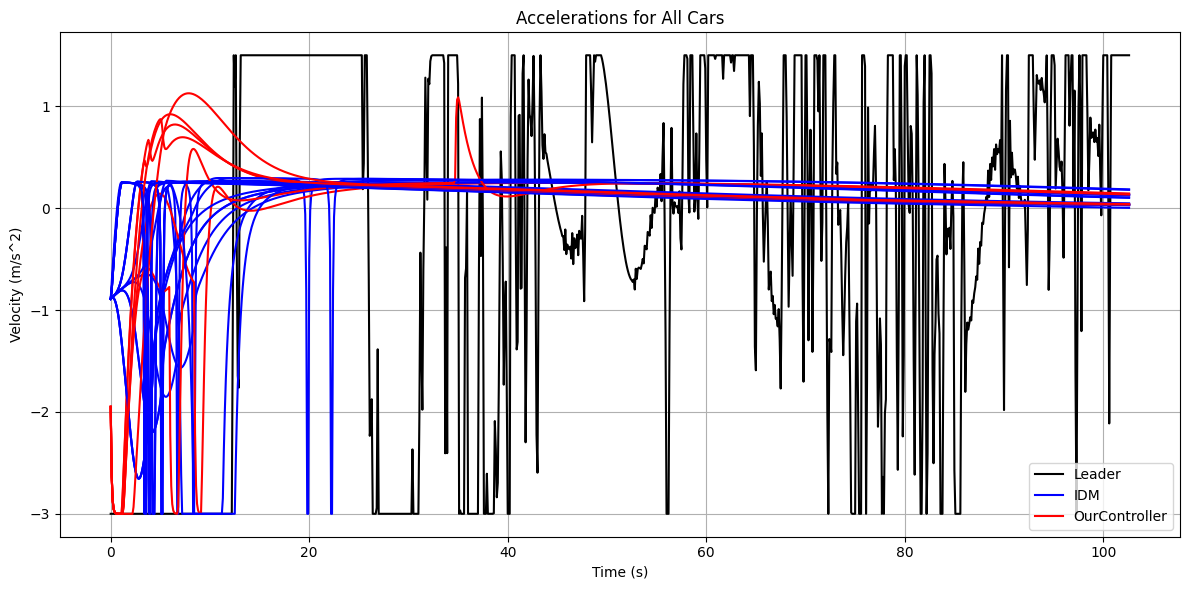

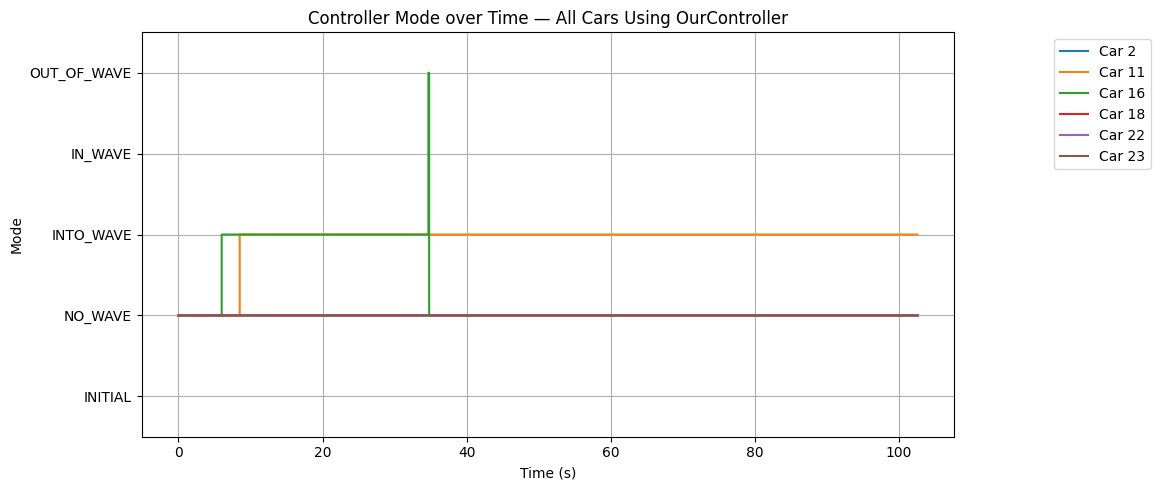

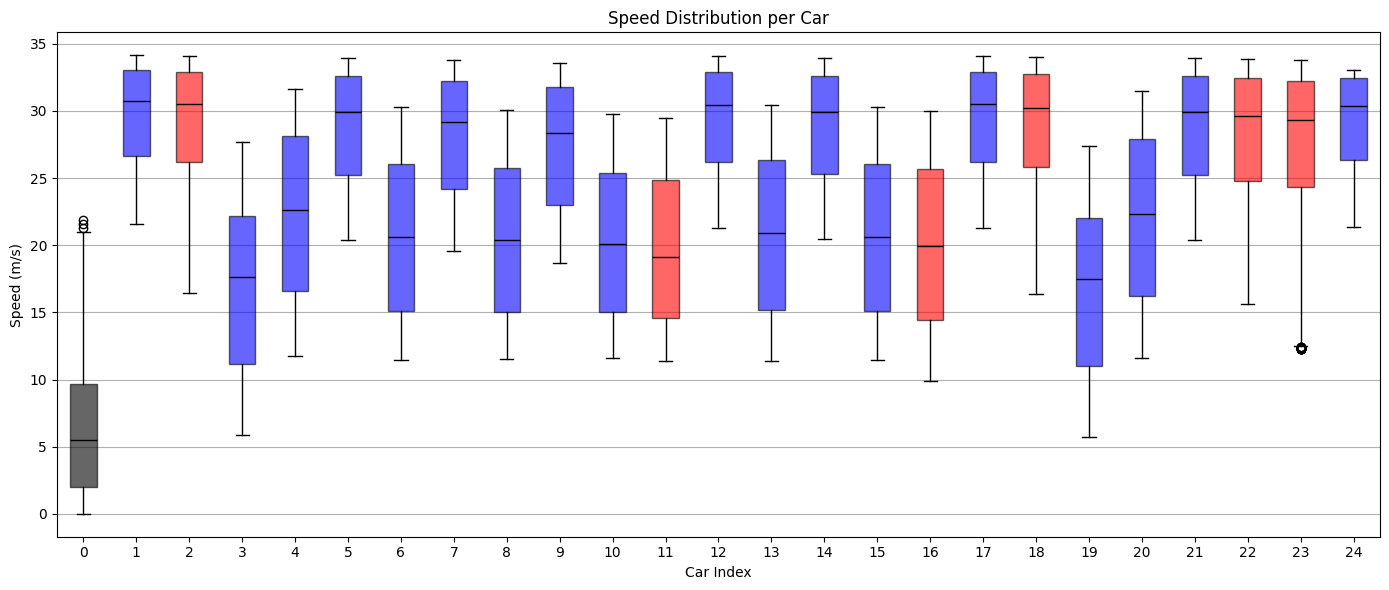

{'max_jerk_per_car': [45.0,
  23.98170940815767,
  6.825000000000001,
  20.061864135784656,
  25.0519597632491,
  26.538921082744434,
  1.8981193652366812,
  24.287928263952725,
  1.5848894058595953,
  24.981909165981072,
  1.3756591960713216,
  14.76710970282949,
  22.371203676922338,
  2.035380405596532,
  20.95648534146469,
  1.7577504666549126,
  14.46992994508534,
  22.846980032356797,
  6.825000000000001,
  22.412332288277934,
  25.7388643883309,
  26.57672485999076,
  6.825000000000001,
  6.825000000000001,
  26.768562409697765],
 'string_stability': 2383.395892751852,
 'num_crashes': 13,
 'first_crash_index': 1,
 'hard_brake_times': [22.200000000000003,
  0.1,
  0.0,
  4.3,
  0.2,
  0.2,
  0.0,
  0.2,
  0.0,
  0.2,
  0.0,
  0.0,
  0.2,
  0.0,
  0.1,
  0.0,
  0.0,
  0.1,
  0.0,
  4.5,
  0.2,
  0.2,
  0.0,
  0.0,
  0.2]}

In [7]:
follow_ngsim(513, 0.25)

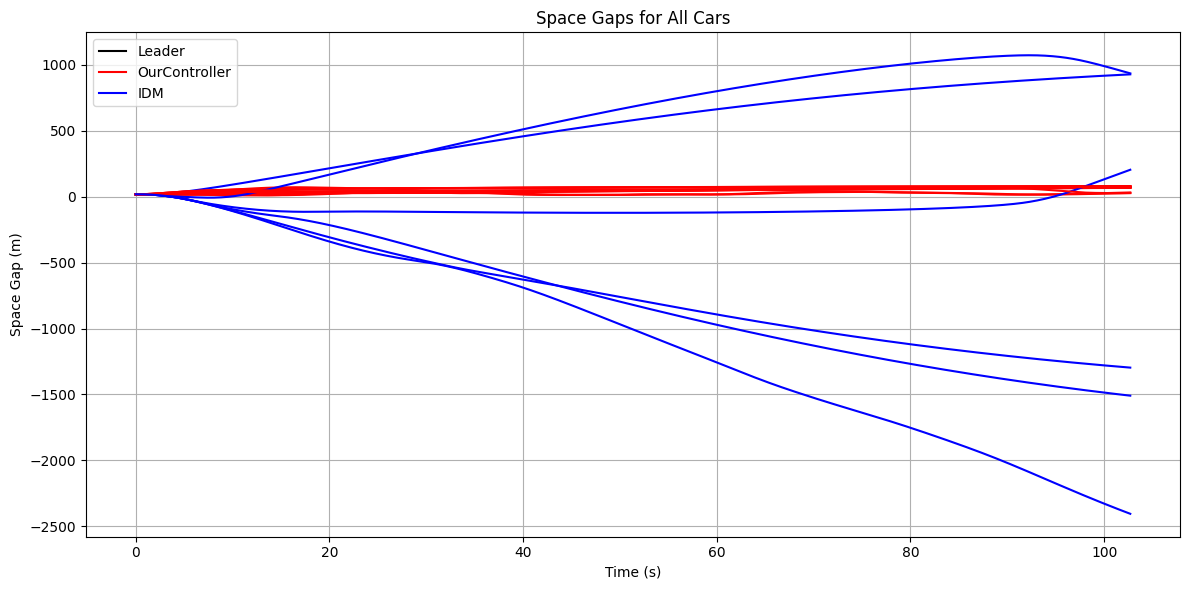

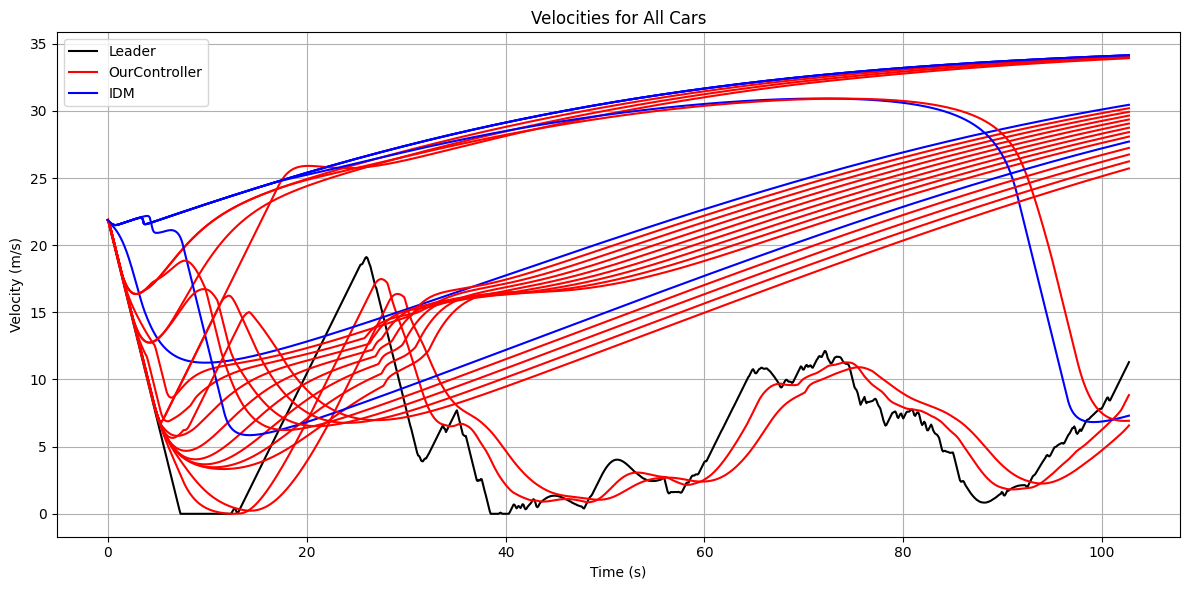

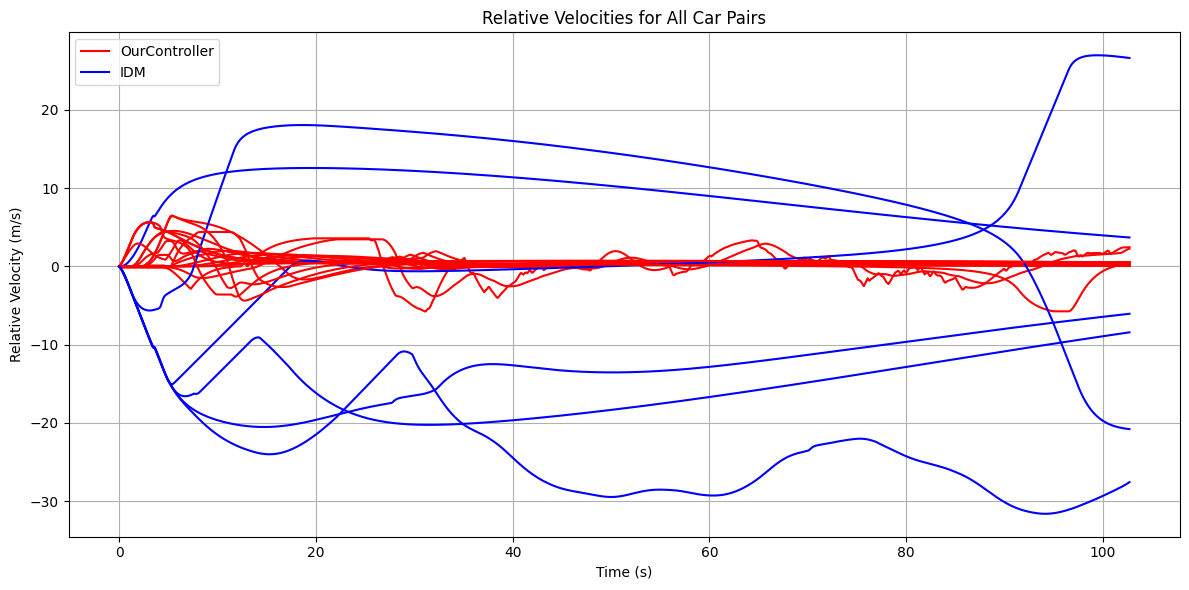

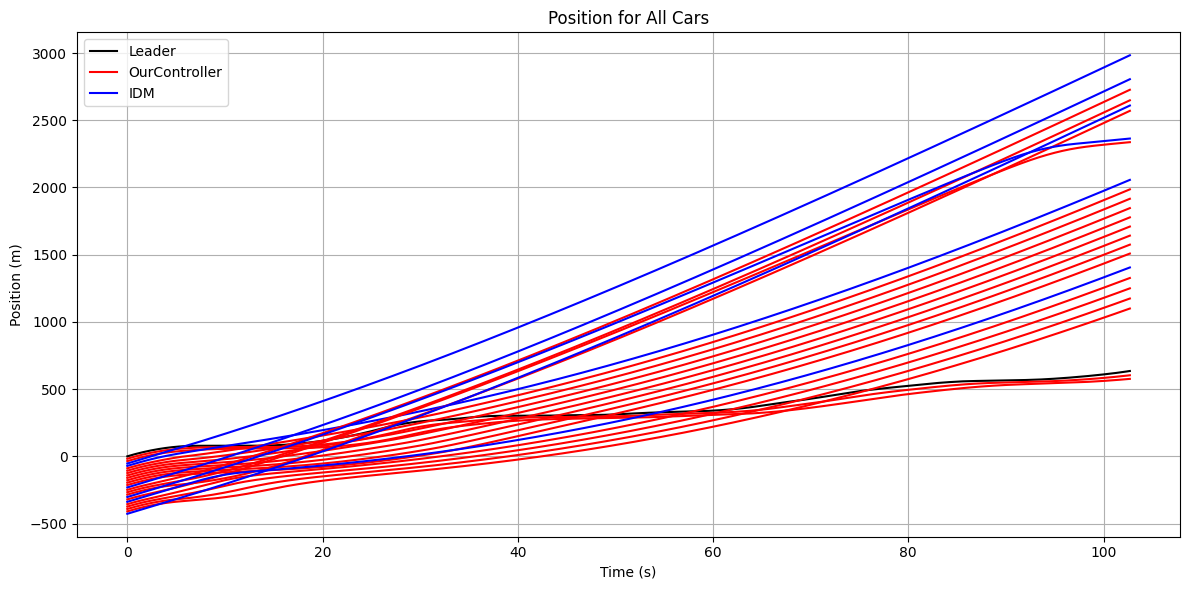

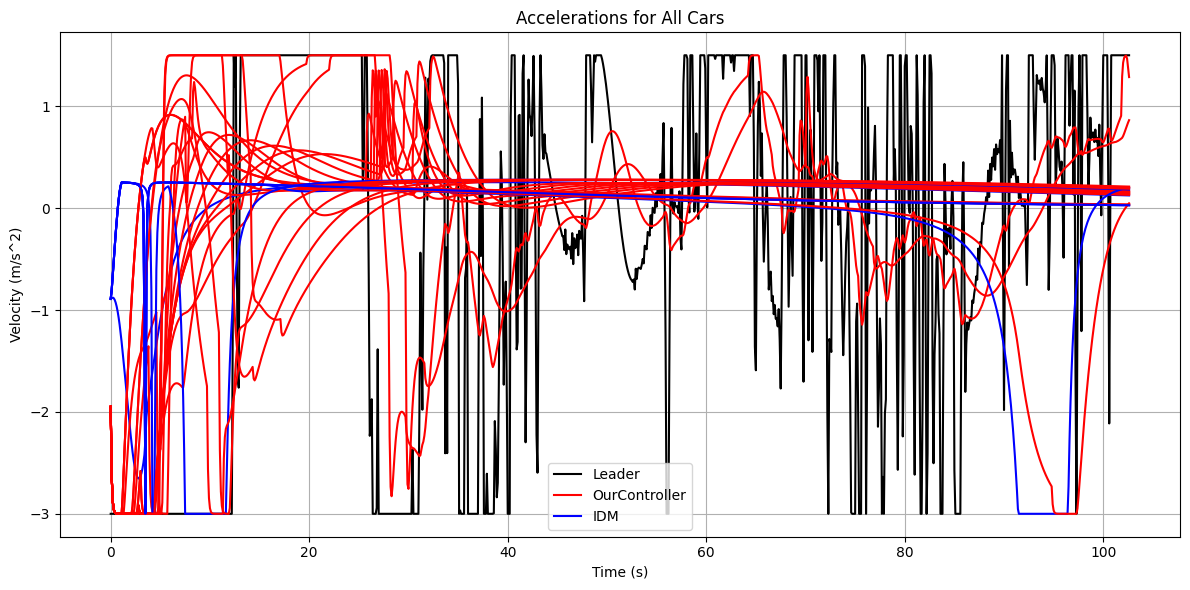

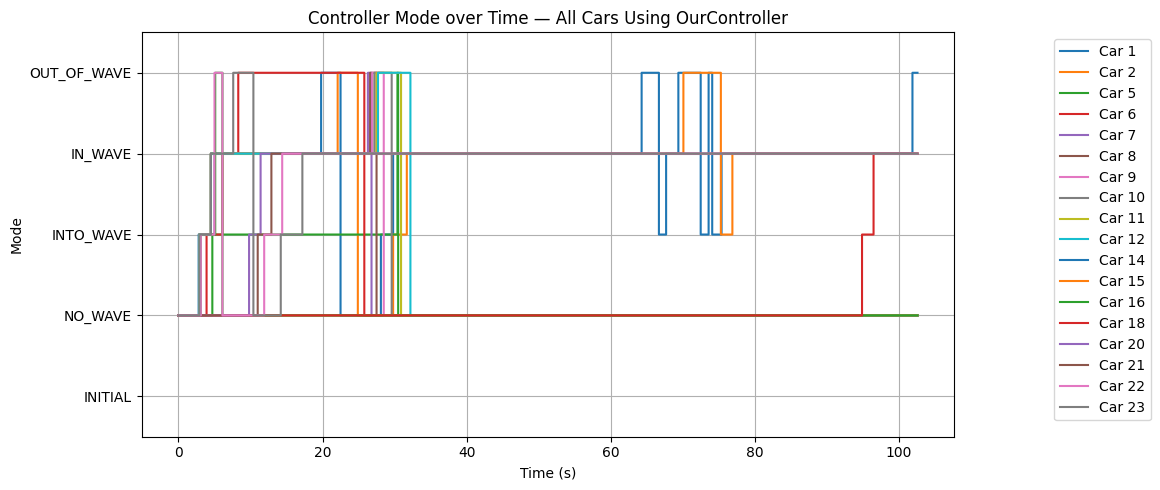

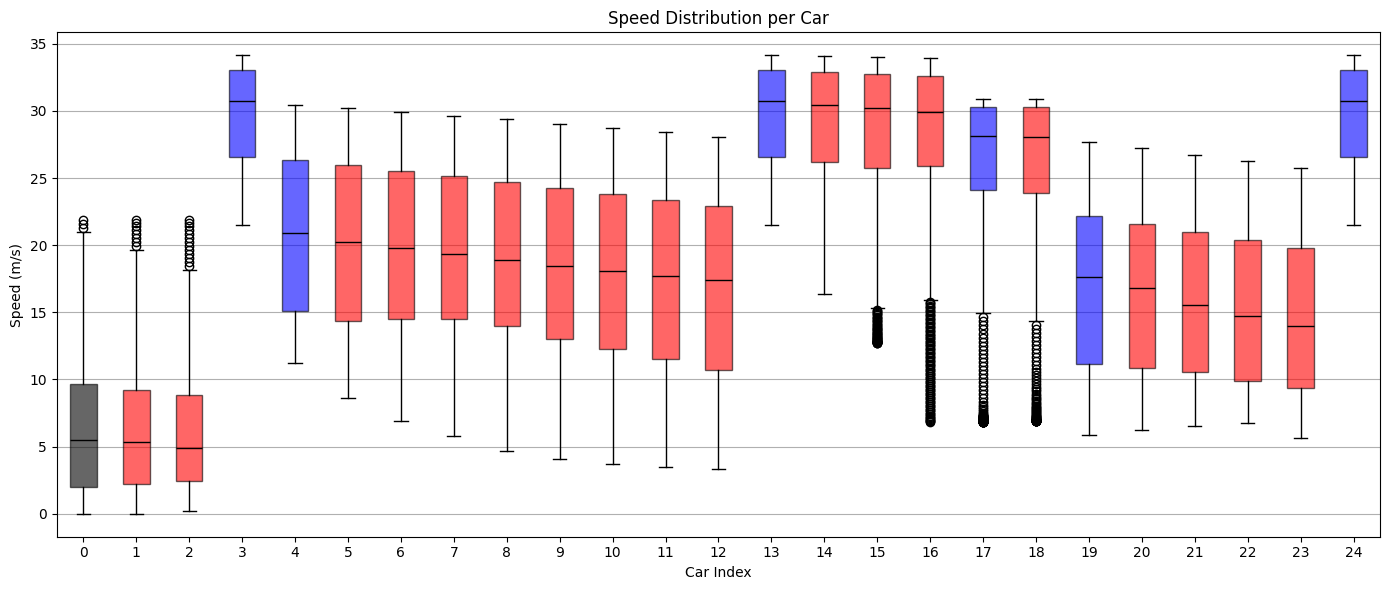

{'max_jerk_per_car': [45.0,
  14.044908334144996,
  15.389116612570115,
  24.006949415374578,
  2.2473712337484075,
  12.861539427053513,
  10.687089728517156,
  13.19289338541664,
  8.000669130863383,
  7.926375901106733,
  7.671841840284161,
  7.2817129556840765,
  7.045654554486551,
  24.006949415374113,
  6.825000000000001,
  6.825000000000001,
  8.521843154880047,
  22.9937799515041,
  6.825000000000001,
  21.83539272656083,
  8.143931960920096,
  11.57677869959388,
  10.480387541876341,
  8.388686229049972,
  24.004326716143318],
 'string_stability': 2397.9092597437293,
 'num_crashes': 5,
 'first_crash_index': 3,
 'hard_brake_times': [22.200000000000003,
  1.0,
  0.0,
  0.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.1,
  0.0,
  0.0,
  0.0,
  5.1000000000000005,
  0.0,
  4.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.1]}

In [8]:
follow_ngsim(513, 0.75)

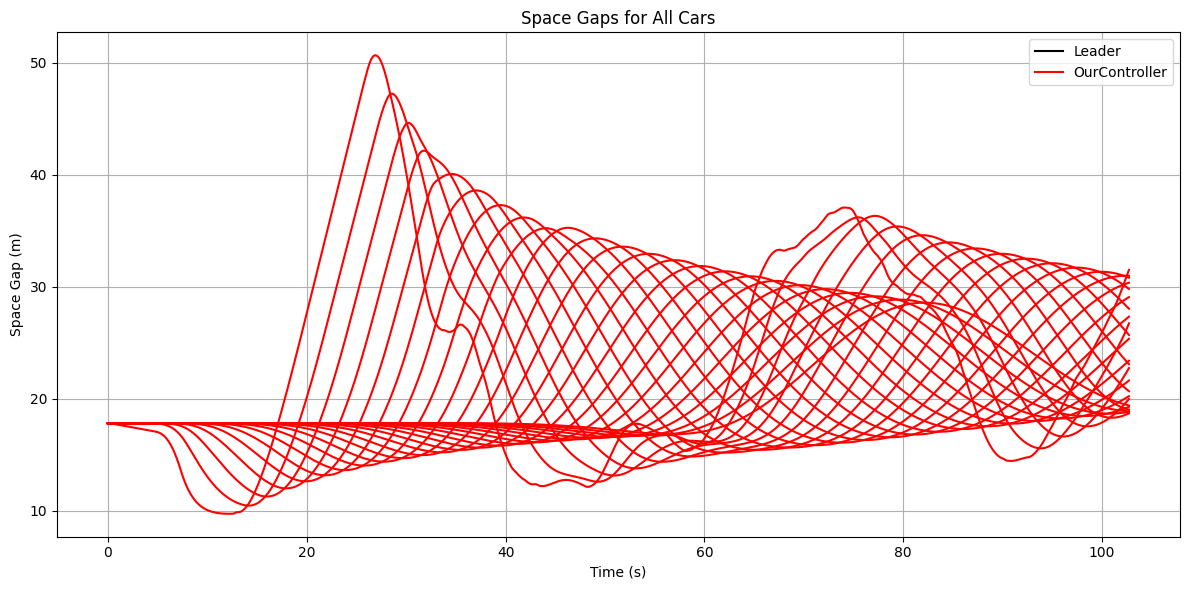

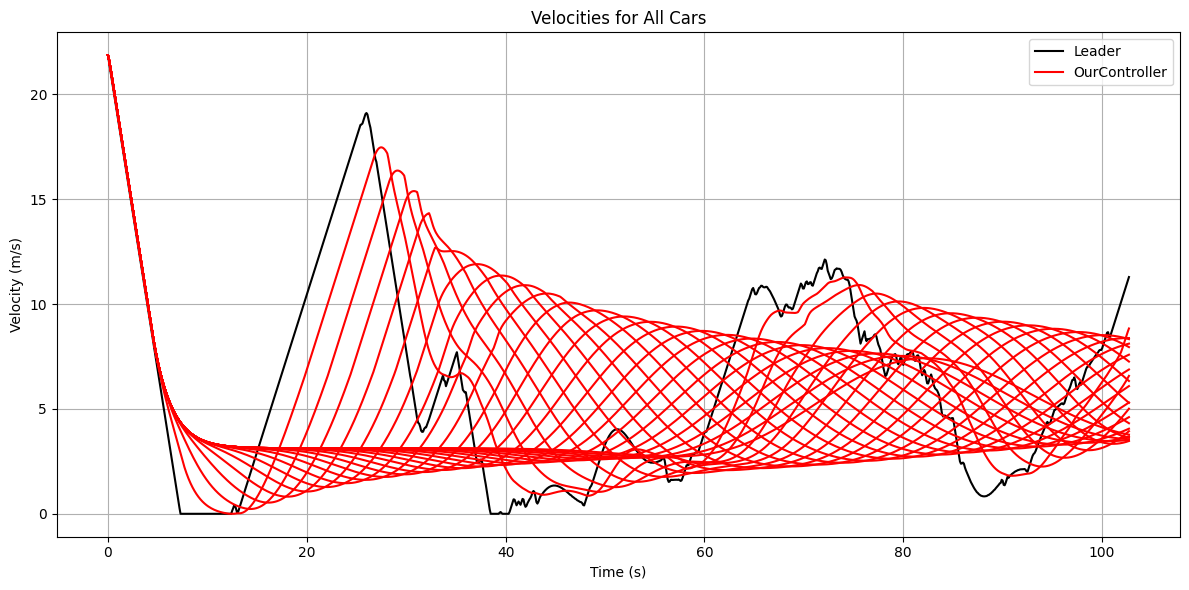

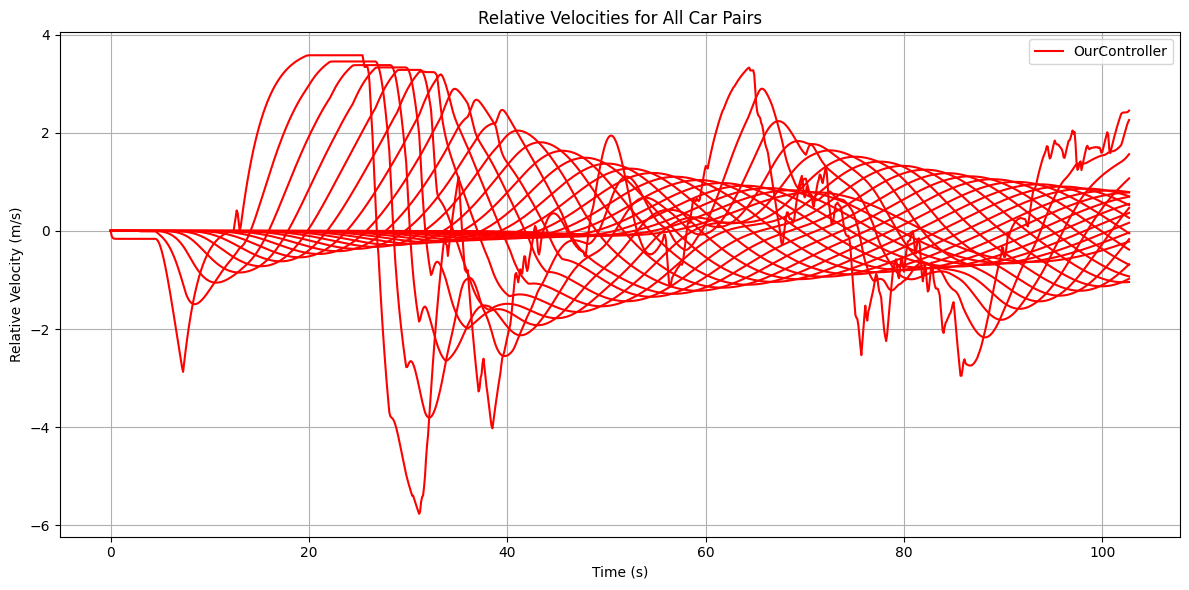

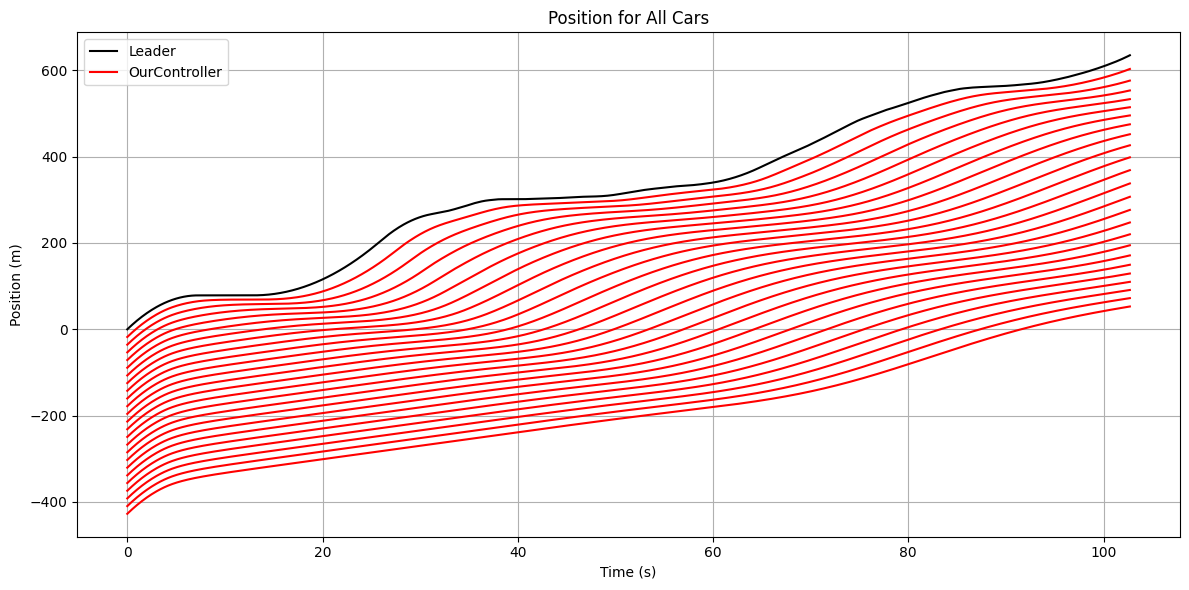

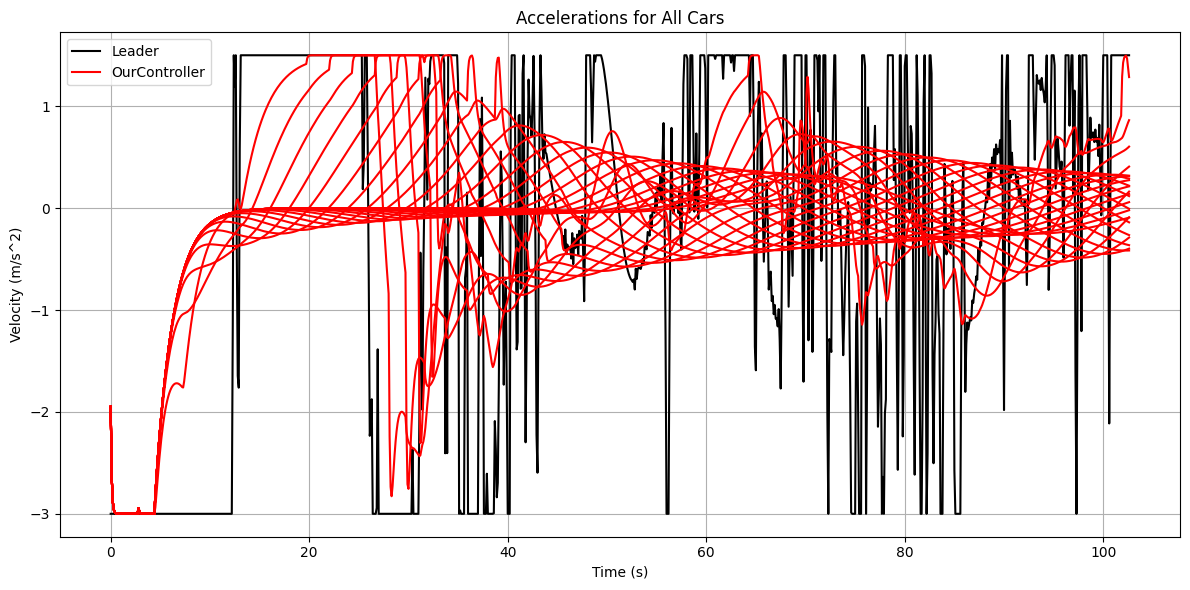

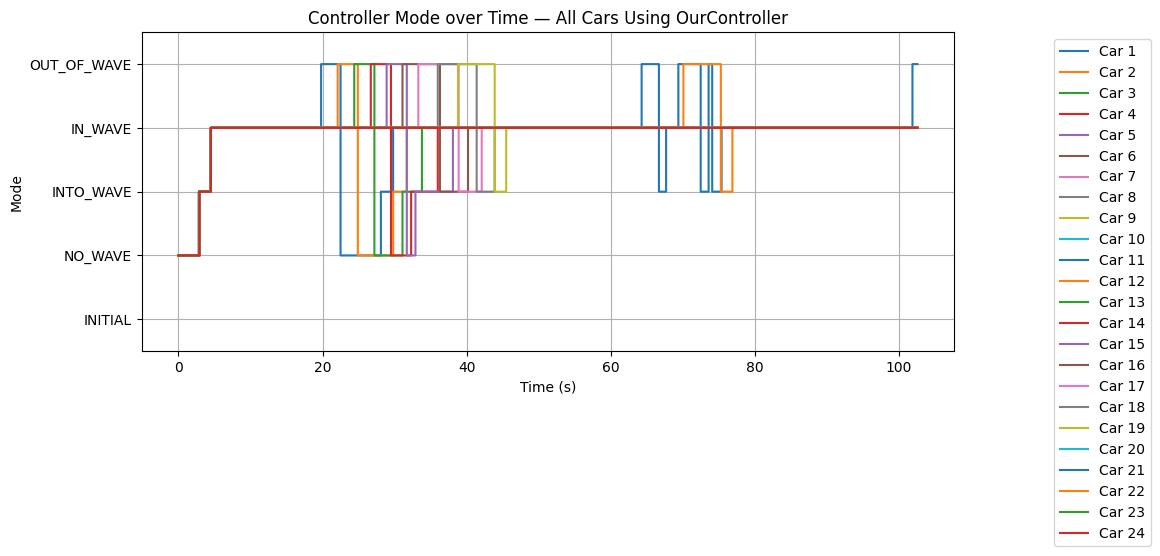

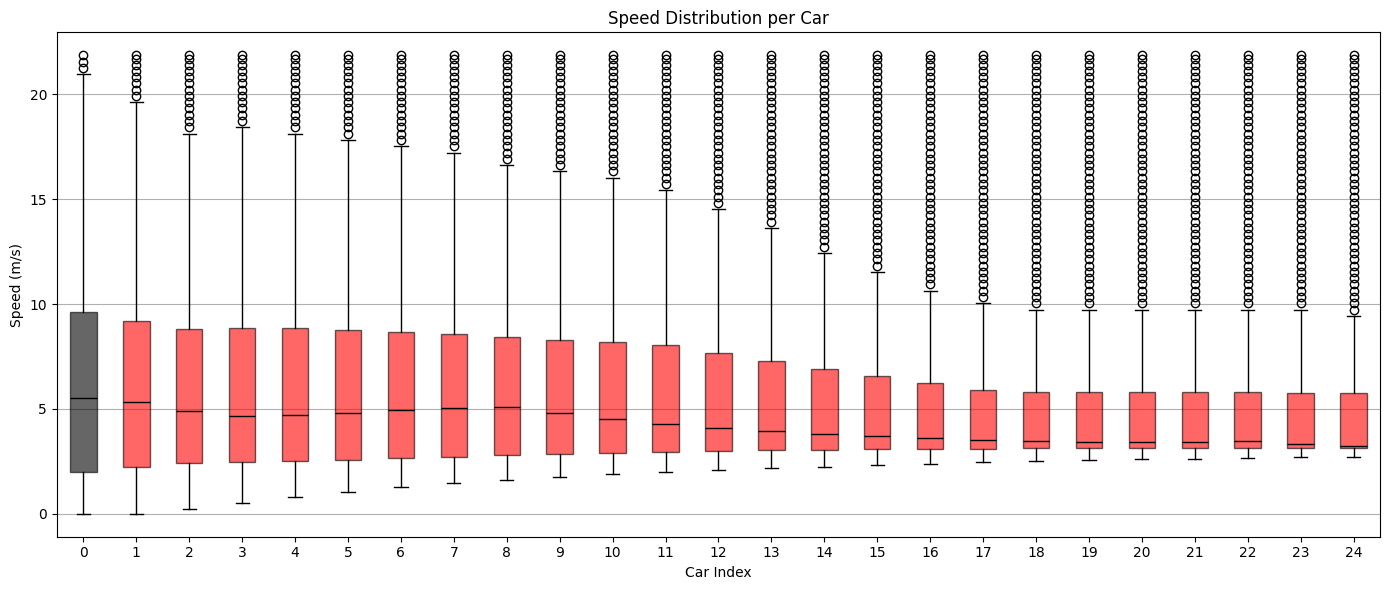

{'max_jerk_per_car': [45.0,
  14.044908334144996,
  15.389116612570115,
  16.228671235057792,
  14.508607723204724,
  10.903106778473676,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001,
  6.825000000000001],
 'string_stability': 72.42121582086358,
 'num_crashes': 0,
 'first_crash_index': None,
 'hard_brake_times': [22.200000000000003,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

In [9]:
follow_ngsim(513, 1.0)